 STEP 0 — Install & Import Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imagehash
from PIL import Image
from glob import glob
from scipy.stats import variation

train_path = '/kaggle/input/datasets/jubayerhasan755/alzheimer-dataset02/alzheimer/train'
test_path = '/kaggle/input/datasets/jubayerhasan755/alzheimer-dataset02/alzheimer/test'

**Class Distribution**

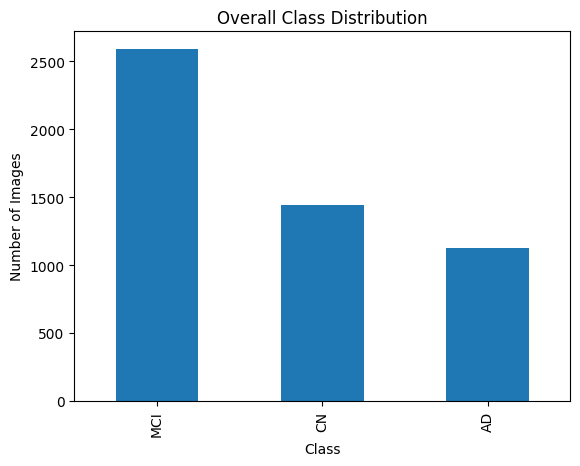

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

data = []
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            data.append({'path': os.path.join(folder_path, file), 'class': folder, 'set': 'train'})

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            data.append({'path': os.path.join(folder_path, file), 'class': folder, 'set': 'test'})

df = pd.DataFrame(data)

df['class'].value_counts().plot(kind='bar')
plt.title("Overall Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

**RGB & HSV Histogram**

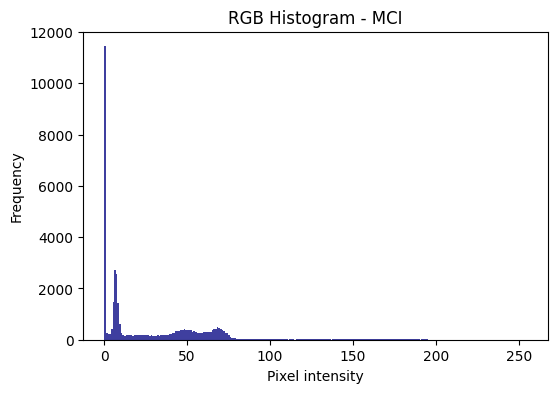

In [3]:
import cv2
import matplotlib.pyplot as plt

def plot_rgb_hist(image, title="RGB Histogram"):
    colors = ['r', 'g', 'b']
    plt.figure(figsize=(6,4))
    for i, c in enumerate(colors):
        plt.hist(image[:,:,i].ravel(), bins=256, color=c, alpha=0.5)
    plt.title(title)
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    plt.show()

img_path = df.iloc[0]['path']
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plot_rgb_hist(image, title=f"RGB Histogram - {df.iloc[0]['class']}")

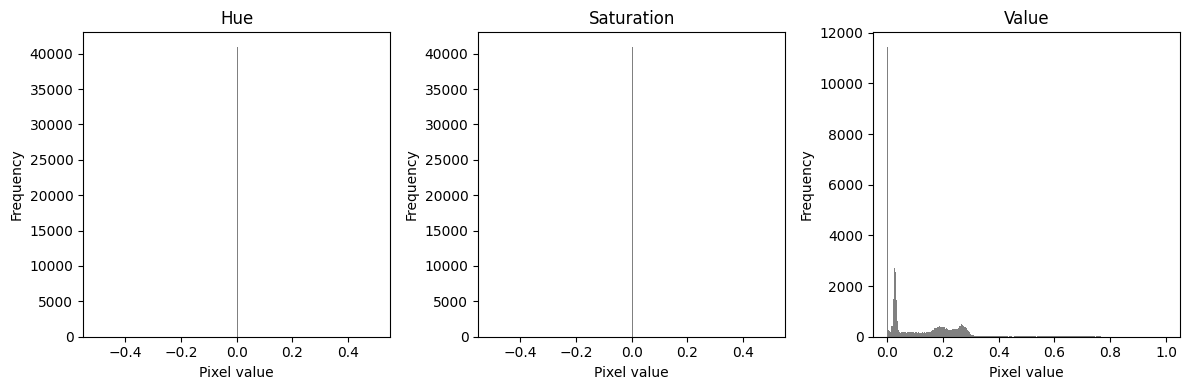

In [4]:
import cv2
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

def plot_hsv_hist(image, title="HSV Histogram"):
    hsv_img = rgb2hsv(image)
    labels = ["Hue", "Saturation", "Value"]
    plt.figure(figsize=(12,4))
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.hist(hsv_img[:,:,i].ravel(), bins=256, color='gray')
        plt.title(labels[i])
        plt.xlabel("Pixel value")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

img_path = df.iloc[0]['path']
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plot_hsv_hist(image, title=f"HSV Histogram - {df.iloc[0]['class']}")

**Brightness**

In [5]:
import cv2
import numpy as np

mean_brightness = []
std_brightness = []

for img_path in df['path']:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_brightness.append(np.mean(gray))
    std_brightness.append(np.std(gray))

df["mean_brightness"] = mean_brightness
df["std_brightness"] = std_brightness

df.head()

,path,class,set,mean_brightness,std_brightness
0,/kaggle/input/datasets/jubayerhasan755/alzheim...,MCI,train,28.954663,36.631778
1,/kaggle/input/datasets/jubayerhasan755/alzheim...,MCI,train,23.727002,28.572960
2,/kaggle/input/datasets/jubayerhasan755/alzheim...,MCI,train,39.947541,45.958529
3,/kaggle/input/datasets/jubayerhasan755/alzheim...,MCI,train,28.286144,37.097144
4,/kaggle/input/datasets/jubayerhasan755/alzheim...,MCI,train,26.447266,40.959648


In [6]:
brightness_stats = df.groupby("class")[["mean_brightness", "std_brightness"]].mean()
print(brightness_stats)

       mean_brightness  std_brightness
class                                 
AD           32.654874       41.366631
CN           32.465459       39.772692
MCI          31.810620       39.048730


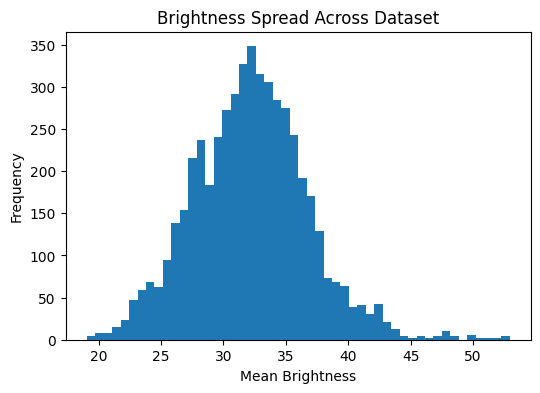

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["mean_brightness"], bins=50)
plt.xlabel("Mean Brightness")
plt.ylabel("Frequency")
plt.title("Brightness Spread Across Dataset")
plt.show()

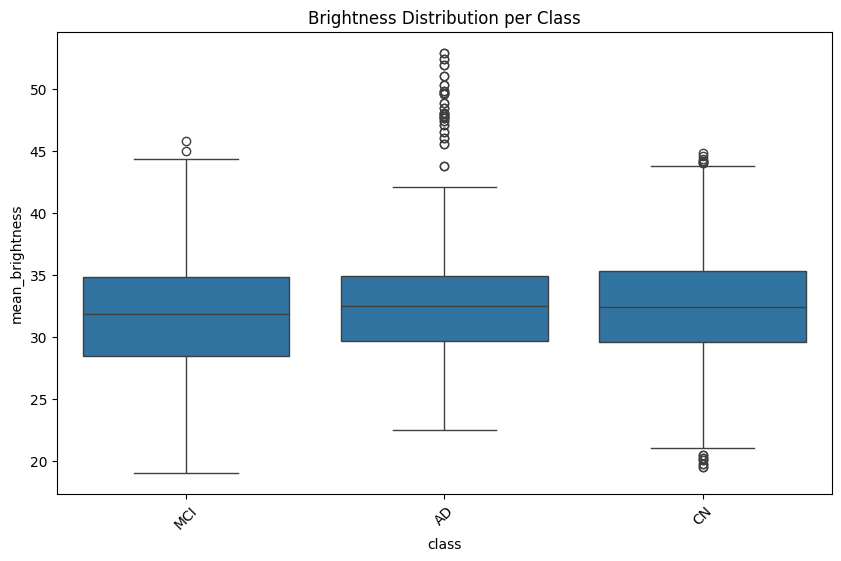

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="class", y="mean_brightness")
plt.xticks(rotation=45)
plt.title("Brightness Distribution per Class")
plt.show()

**Contrast**

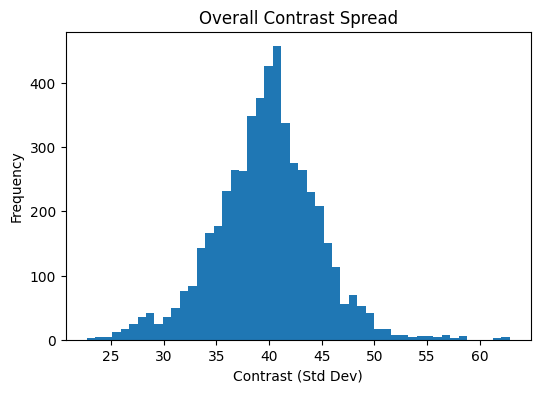

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["std_brightness"], bins=50)
plt.xlabel("Contrast (Std Dev)")
plt.ylabel("Frequency")
plt.title("Overall Contrast Spread")
plt.show()

**Image Resolution Distribution**

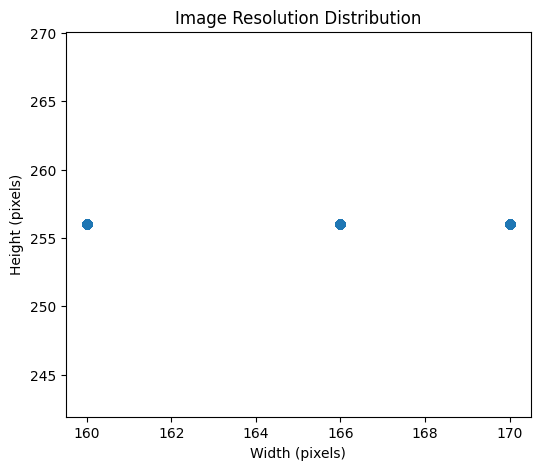

In [10]:
import cv2
import matplotlib.pyplot as plt

widths = []
heights = []

for img_path in df['path']:
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    widths.append(w)
    heights.append(h)

df["width"] = widths
df["height"] = heights

plt.figure(figsize=(6, 5))
plt.scatter(df["width"], df["height"], alpha=0.5)
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Image Resolution Distribution")
plt.show()

**Sharpness**

In [11]:
from skimage.filters import laplace
from skimage.util import img_as_float
import cv2
import numpy as np

sharpness_scores = []

for img_path in df['path']:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lap_var = laplace(img_as_float(gray)).var()
    sharpness_scores.append(lap_var)

df["sharpness"] = sharpness_scores

print(df[["sharpness"]].describe())

         sharpness
count  5154.000000
mean      0.014087
std       0.003721
min       0.005091
25%       0.011557
50%       0.013901
75%       0.016398
max       0.027236


**Sharpness by Class**

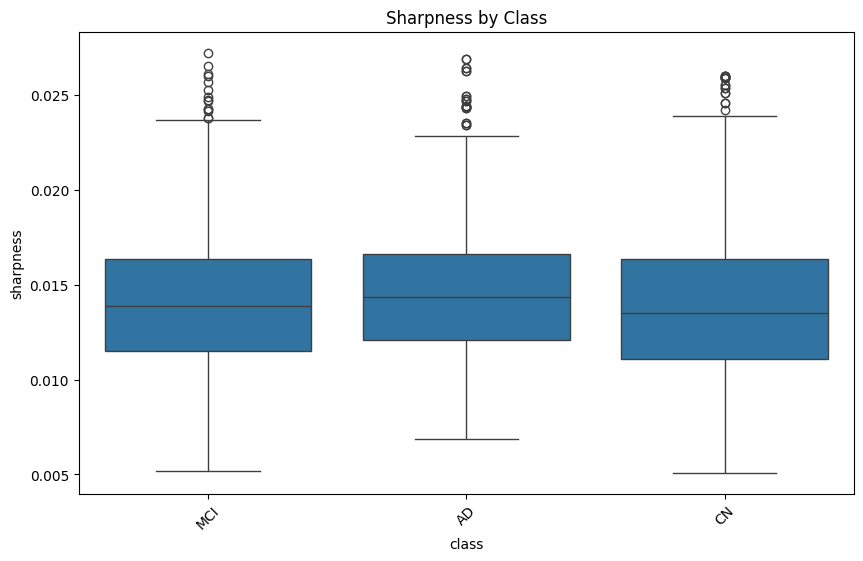

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="class", y="sharpness")
plt.xticks(rotation=45)
plt.title("Sharpness by Class")
plt.show()

**Noise Level**

In [13]:
import cv2
import numpy as np

noise_levels = []

for img_path in df['path']:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_levels.append(np.var(gray))

df["noise"] = noise_levels

print(df[["noise"]].describe())

             noise
count  5154.000000
mean   1604.487304
std     392.250864
min     514.949984
25%    1354.966133
50%    1593.260845
75%    1824.111794
max    3947.951091


**Noise Distribution**

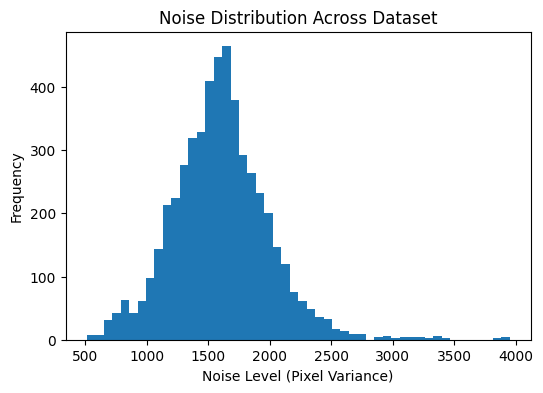

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["noise"], bins=50)
plt.xlabel("Noise Level (Pixel Variance)")
plt.ylabel("Frequency")
plt.title("Noise Distribution Across Dataset")
plt.show()

**Noise Level per Class**

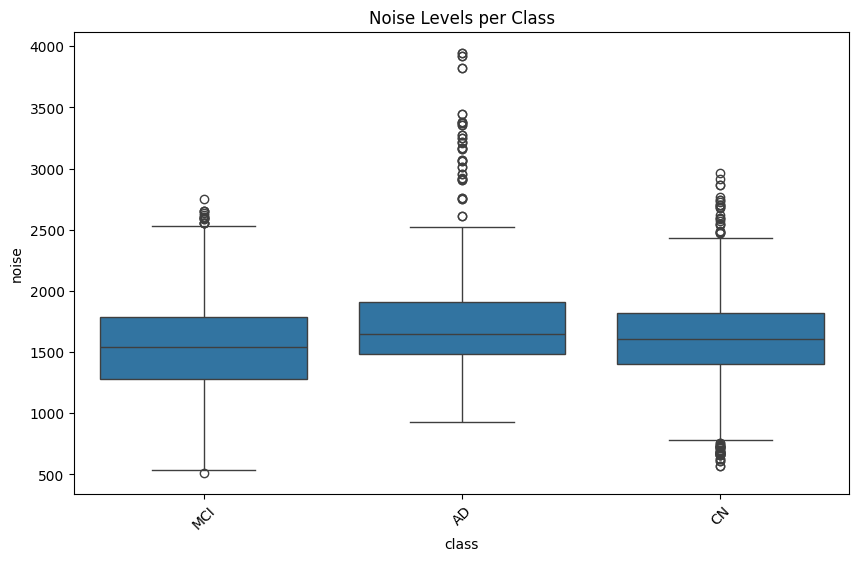

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="class", y="noise")
plt.xticks(rotation=45)
plt.title("Noise Levels per Class")
plt.show()

**white-balance sanity via a gray-world
check**

In [16]:
import cv2
import numpy as np

rgb_means = []

for img_path in df['path']:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mean_rgb = np.mean(img, axis=(0,1))
    rgb_means.append(mean_rgb)

rgb_means = np.array(rgb_means)

df["mean_R"] = rgb_means[:,0]
df["mean_G"] = rgb_means[:,1]
df["mean_B"] = rgb_means[:,2]

print(df[["mean_R", "mean_G", "mean_B"]].head())

      mean_R     mean_G     mean_B
0  28.954663  28.954663  28.954663
1  23.727002  23.727002  23.727002
2  39.947541  39.947541  39.947541
3  28.286144  28.286144  28.286144
4  26.447266  26.447266  26.447266


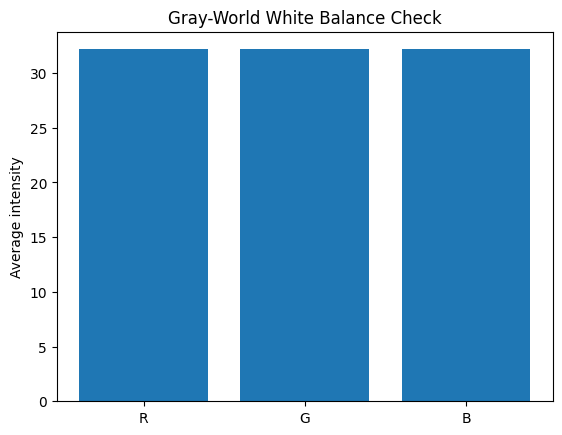

In [17]:
import matplotlib.pyplot as plt

channel_avg = [
    df["mean_R"].mean(),
    df["mean_G"].mean(),
    df["mean_B"].mean()
]

plt.bar(["R", "G", "B"], channel_avg)
plt.ylabel("Average intensity")
plt.title("Gray-World White Balance Check")
plt.show()

**Aspect Ratio Distribution**

In [18]:
resolution_counts = df.groupby(["width", "height"]).size().sort_values(ascending=False).head(10)
print(resolution_counts)

width  height
160    256       2847
170    256       1760
166    256        547
dtype: int64


**Augmentation**

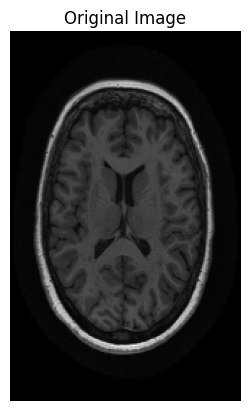

In [19]:
import cv2
import matplotlib.pyplot as plt

sample_path = df[df["set"]=="train"].iloc[0]["path"]
train_sample = cv2.imread(sample_path)
train_sample = cv2.cvtColor(train_sample, cv2.COLOR_BGR2RGB)

plt.imshow(train_sample)
plt.title("Original Image")
plt.axis("off")
plt.show()

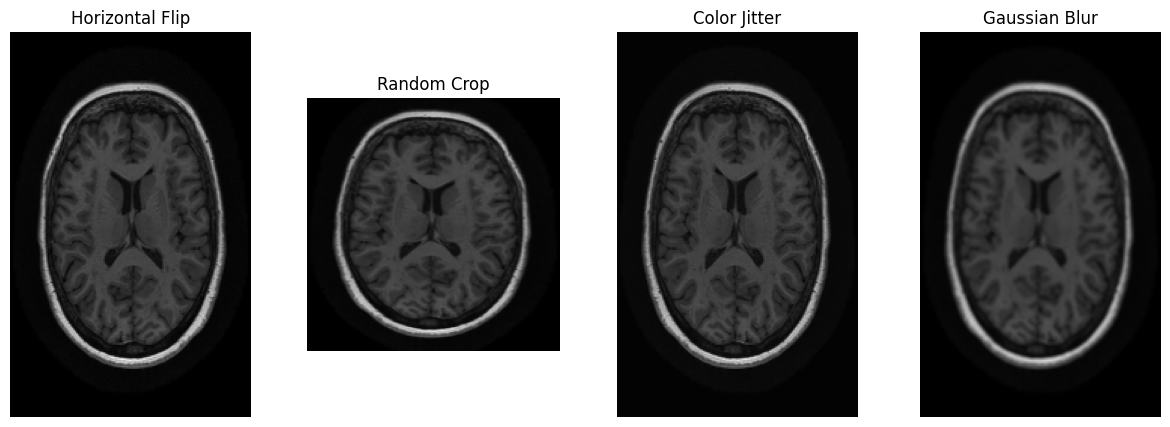

In [20]:
import torchvision.transforms as T
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image

augmentations = {
    "Horizontal Flip": T.RandomHorizontalFlip(p=1),
    "Random Crop": T.RandomResizedCrop(size=200, scale=(0.8,1.0)),
    "Color Jitter": T.ColorJitter(brightness=0.2, contrast=0.2),
    "Gaussian Blur": T.GaussianBlur(3)
}

to_pil = T.ToPILImage()

sample_path = df[df["set"]=="train"].iloc[0]["path"]
image_bgr = cv2.imread(sample_path)
train_sample_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(train_sample_rgb)

plt.figure(figsize=(15, 5))
for i, (name, aug) in enumerate(augmentations.items()):
    aug_img = aug(pil_img)
    plt.subplot(1, 4, i+1)
    plt.imshow(aug_img)
    plt.title(name)
    plt.axis("off")
plt.show()